In [1]:
#pip install statsbombpy

<h2> Data Extraction

In [33]:
# import library and get the list of available functions.
from statsbombpy import sb

functions = [func for func in dir(sb) if callable(getattr(sb, func))]
functions

['Pool',
 'Union',
 '_360_frames',
 'competition_events',
 'competition_frames',
 'competitions',
 'events',
 'filter_and_group_events',
 'frames',
 'lineups',
 'matches',
 'merge_events_and_frames',
 'partial',
 'player_match_stats',
 'player_season_stats',
 'reduce_events',
 'team_season_stats']

In [34]:
# show all competitions
sb.competitions()

C:\Users\paulc\anaconda3\lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2022-12-01T11:42:34.874323,2021-06-13T16:17:31.694,None,2022-12-01T11:42:34.874323
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-11-15T17:26:10.871011,2021-06-13T16:17:31.694,None,2022-11-15T17:26:10.871011


In [35]:
sb.matches(competition_id=16,season_id=37)

C:\Users\paulc\anaconda3\lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated,last_updated_360,match_week,competition_stage,stadium,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,2302764,2005-05-25,None,Europe - Champions League,2004/2005,AC Milan,Liverpool,3,3,available,...,2021-04-01T06:18:57.459032,2021-06-13T16:17:31.694,1,Final,Atatürk Olimpiyat Stadı,,,1.1.0,2,2


In [36]:
df = sb.events(match_id = 2302764)
df.columns

C:\Users\paulc\anaconda3\lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'block_save_block',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pa

<h2> Data Cleaning

In [37]:
df = df[df.shot_statsbomb_xg.isna()==False]

In [38]:
df = df[['team', 'timestamp', 'type',
       'under_pressure','shot_body_part','player','shot_outcome','shot_statsbomb_xg','play_pattern','period','location']].reset_index(drop=True)

In [39]:
import pandas as pd


# Convert timestamp column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Calculate the minute of each data point
df['minute'] = (df['period'] - 1) * 45 + df['timestamp'].dt.minute

# Adjust for periods 3 and 4
df.loc[df['period'] > 2, 'minute'] = 90 + (df['period'] - 3) * 15 + df['timestamp'].dt.minute

In [40]:
# extract the x and y coordinates, use the apply method on the 'location' column of the DataFrame 
#to create a new column that contains the 0th element of each list in the 'location' column

df['x'] =   df['location'].apply(lambda x: x[0])
df['y'] =   df['location'].apply(lambda x: x[1])

In [154]:
df.head(100)

,team,timestamp,type,under_pressure,shot_body_part,player,shot_outcome,shot_statsbomb_xg,play_pattern,period,location,minute,x,y
0,AC Milan,2023-02-21 00:00:51.155,Shot,NaN,Right Foot,Paolo Maldini,Goal,0.059195,From Free Kick,1,"[107.6, 42.1]",0,107.6,42.1
1,Liverpool,2023-02-21 00:03:48.106,Shot,NaN,Left Foot,John Arne Semundseth Riise,Blocked,0.027243,From Corner,1,"[98.4, 33.3]",3,98.4,33.3
2,Liverpool,2023-02-21 00:03:57.139,Shot,NaN,Head,Sami Hyypiä,Saved,0.018038,Regular Play,1,"[106.9, 44.4]",3,106.9,44.4
3,AC Milan,2023-02-21 00:09:34.205,Shot,NaN,Right Foot,Ivan Gennaro Gattuso,Blocked,0.011739,From Throw In,1,"[86.5, 53.5]",9,86.5,53.5
4,AC Milan,2023-02-21 00:13:36.820,Shot,NaN,Head,Hernán Jorge Crespo,Blocked,0.025281,From Corner,1,"[114.9, 50.2]",13,114.9,50.2
5,AC Milan,2023-02-21 00:13:39.210,Shot,True,Head,Jaap Stam,Blocked,0.063993,From Corner,1,"[113.1, 40.5]",13,113.1,40.5
6,AC Milan,2023-02-21 00:17:10.017,Shot,NaN,Head,Ricardo Izecson dos Santos Leite,Off T,0.039138,Regular Play,1,"[104.5, 48.5]",17,104.5,48.5
7,Liverpool,2023-02-21 00:29:13.459,Shot,NaN,Left Foot,Milan Baroš,Off T,0.041778,From Free Kick,1,"[98.0, 38.3]",29,98.0,38.3
8,Liverpool,2023-02-21 00:32:36.202,Shot,NaN,Left Foot,Luis Javier García Sanz,Off T,0.026821,Regular Play,1,"[97.2, 29.1]",32,97.2,29.1
9,Liverpool,2023-02-21 00:35:37.699,Shot,NaN,Right Foot,Luis Javier García Sanz,Off T,0.080985,Regular Play,1,"[101.7, 36.1]",35,101.7,36.1


<h2> Data Visualisation

90 minute xGs

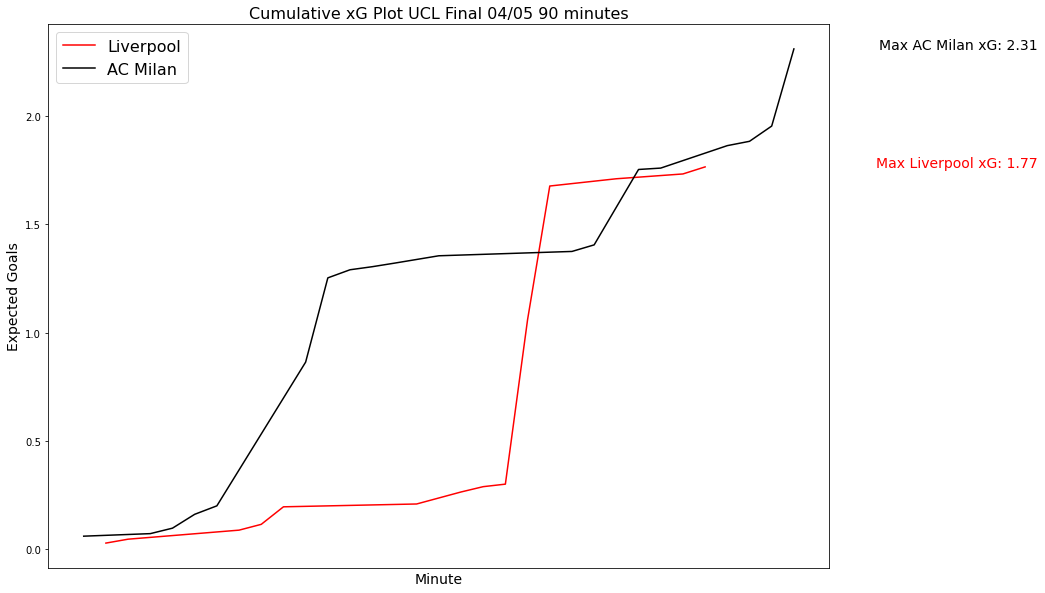

In [10]:
import matplotlib.pyplot as plt
import numpy as np


# Set plot size
plt.figure(figsize=(14,10))

# Calculate cumulative sum of shot_statsbomb_xg for each team
home_xg_cumulative = df[(df['team'] == 'Liverpool') & (df['period'] < 3)]['shot_statsbomb_xg'].cumsum()
away_xg_cumulative = df[(df['team'] =='AC Milan') & (df['period'] <3)]['shot_statsbomb_xg'].cumsum()

# Plot the cumulative sum of shot_statsbomb_xg for each team against the minute values
plt.plot(home_xg_cumulative, label='Liverpool', color='red')
plt.plot(away_xg_cumulative, label='AC Milan', color='black')

# Add title, x-axis and y-axis labels, and legend to the plot
plt.title('Cumulative xG Plot UCL Final 04/05 90 minutes', fontsize=16)
plt.xlabel('Minute', fontsize=14)
plt.ylabel('Expected Goals', fontsize=14)
plt.legend(prop={'size': 16})
# remove the x-ticks text
plt.xticks([])
# Add text showing the maximum value of each team's cumulative xG
max_home_xg = max(home_xg_cumulative)
max_away_xg = max(away_xg_cumulative)
plt.text(43, max_home_xg, f"Max Liverpool xG: {max_home_xg:.2f}", fontsize=14, color='red', ha='right')
plt.text(43, max_away_xg, f"Max AC Milan xG: {max_away_xg:.2f}", fontsize=14, color='black', ha='right')

# Show the plot
plt.show()

Including Extra Time - But excluding Penalties

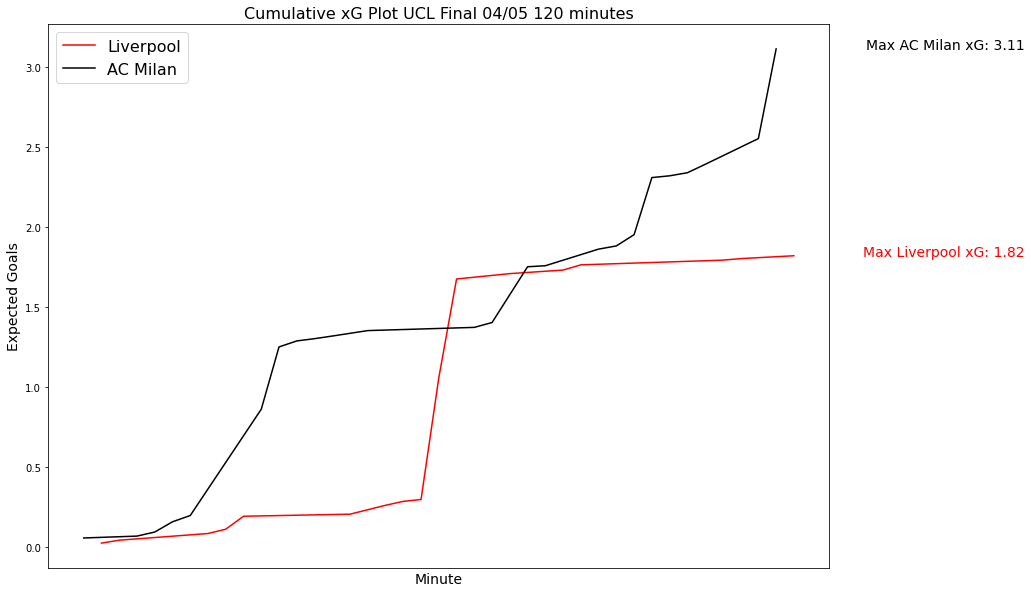

In [155]:
import matplotlib.pyplot as plt
import numpy as np


# Set plot size
plt.figure(figsize=(14,10))

# Calculate cumulative sum of shot_statsbomb_xg for each team
home_xg_cumulative = df[(df['team'] == 'Liverpool') & (df['period'] < 5)]['shot_statsbomb_xg'].cumsum()
away_xg_cumulative = df[(df['team'] =='AC Milan') & (df['period'] <5)]['shot_statsbomb_xg'].cumsum()

# Plot the cumulative sum of shot_statsbomb_xg for each team against the minute values
plt.plot(home_xg_cumulative, label='Liverpool', color='red')
plt.plot(away_xg_cumulative, label='AC Milan', color='black')

# Add title, x-axis and y-axis labels, and legend to the plot
plt.title('Cumulative xG Plot UCL Final 04/05 120 minutes', fontsize=16)
plt.xlabel('Minute', fontsize=14)
plt.ylabel('Expected Goals', fontsize=14)
plt.legend(prop={'size': 16})
# remove the x-ticks text
plt.xticks([])
# Add text showing the maximum value of each team's cumulative xG
max_home_xg = max(home_xg_cumulative)
max_away_xg = max(away_xg_cumulative)
plt.text(53, max_home_xg, f"Max Liverpool xG: {max_home_xg:.2f}", fontsize=14, color='red', ha='right')
plt.text(53, max_away_xg, f"Max AC Milan xG: {max_away_xg:.2f}", fontsize=14, color='black', ha='right')

# Show the plot
plt.show()

In [104]:
# filter on the xG values of the goals
home_goals = df[(df['team'] == 'Liverpool') & (df['shot_outcome'] == 'Goal') & (df['period'] < 5)]
away_goals = df[(df['team'] =='AC Milan') & (df['shot_outcome'] == 'Goal') & (df['period'] < 5)]

In [105]:
home_goals

,team,timestamp,type,under_pressure,shot_body_part,player,shot_outcome,shot_statsbomb_xg,play_pattern,period,location,minute,x,y
17,Liverpool,2023-02-21 00:08:04.252,Shot,NaN,Head,Steven Gerrard,Goal,0.055449,Regular Play,2,"[109.8, 34.0]",53,109.8,34.0
18,Liverpool,2023-02-21 00:10:02.892,Shot,True,Right Foot,Vladimir Smicer,Goal,0.024584,From Throw In,2,"[95.7, 50.6]",55,95.7,50.6
21,Liverpool,2023-02-21 00:14:52.037,Shot,True,Left Foot,Xabier Alonso Olano,Goal,0.617394,Other,2,"[114.9, 36.5]",59,114.9,36.5


In [106]:
away_goals

,team,timestamp,type,under_pressure,shot_body_part,player,shot_outcome,shot_statsbomb_xg,play_pattern,period,location,minute,x,y
0,AC Milan,2023-02-21 00:00:51.155,Shot,NaN,Right Foot,Paolo Maldini,Goal,0.059195,From Free Kick,1,"[107.6, 42.1]",0,107.6,42.1
10,AC Milan,2023-02-21 00:38:12.674,Shot,NaN,Right Foot,Hernán Jorge Crespo,Goal,0.664028,Regular Play,1,"[114.2, 36.4]",38,114.2,36.4
11,AC Milan,2023-02-21 00:42:57.347,Shot,NaN,Right Foot,Hernán Jorge Crespo,Goal,0.389226,Regular Play,1,"[101.0, 36.2]",42,101.0,36.2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import VerticalPitch, add_image

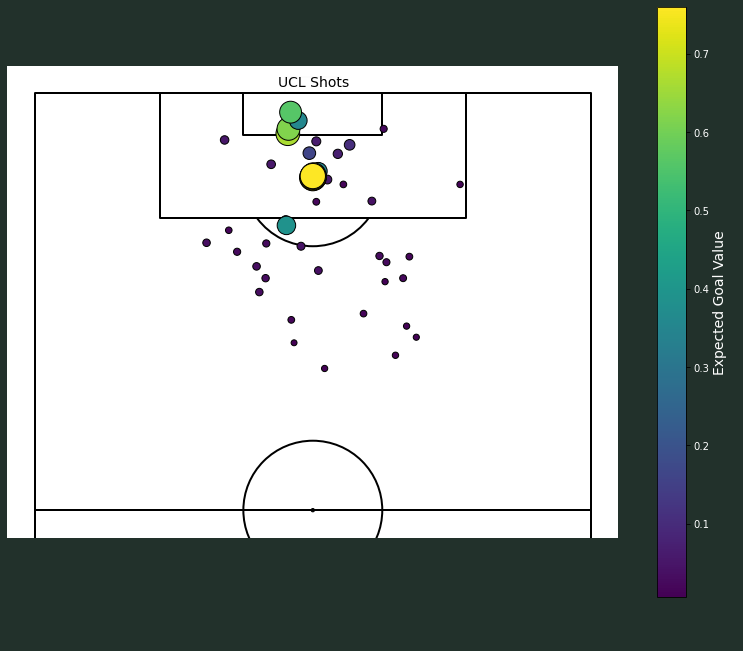

In [151]:
# create a vertical pitch
pitch = VerticalPitch(pitch_type='statsbomb', half=True, goal_type='box', goal_alpha=0.01, pitch_color='white', line_color='black')

fig, axs = pitch.grid(figheight=10, title_height=0, endnote_space=0, axis=False,title_space=0, grid_height=0.82)
fig.set_facecolor("#22312b")

#plotting
scatter_shots = pitch.scatter(df.x, df.y, s=(df.shot_statsbomb_xg * 800)+30, c=df.shot_statsbomb_xg, edgecolors='black', marker='o', ax=axs['pitch'])

# add text
axs['pitch'].text(35, 121,'UCL Shots ',color='Black',size=14)


# add legend
cbar = fig.colorbar(scatter_shots, ax=axs['pitch'])
cbar.ax.set_ylabel('Expected Goal Value', fontsize=14)
cbar.ax.yaxis.label.set_color('white')
cbar.ax.tick_params(labelcolor='white')
plt.show()

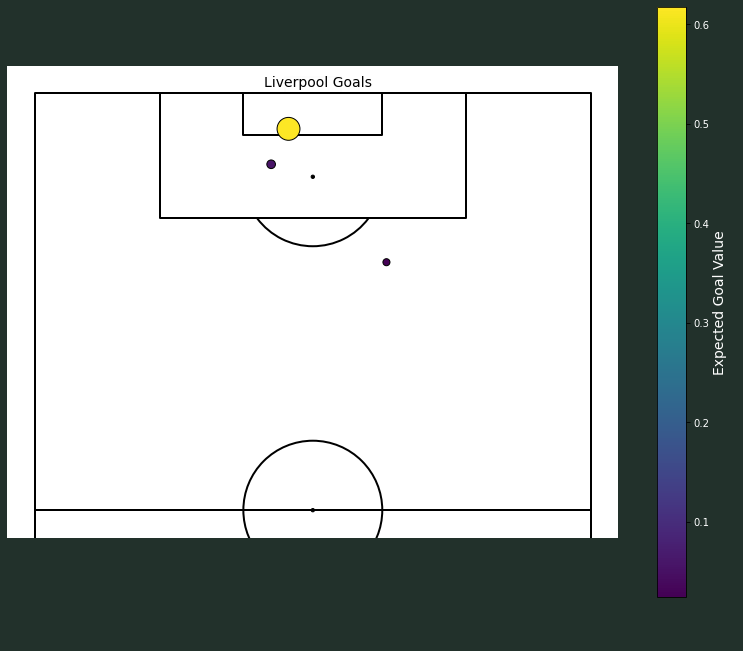

In [152]:
# create a vertical pitch
pitch = VerticalPitch(pitch_type='statsbomb', half=True, goal_type='box', goal_alpha=0.01, pitch_color='white', line_color='black')

fig, axs = pitch.grid(figheight=10, title_height=0, endnote_space=0, axis=False,title_space=0, grid_height=0.82)
fig.set_facecolor("#22312b")

#plotting
scatter_shots = pitch.scatter(home_goals.x, home_goals.y, s=(home_goals.shot_statsbomb_xg * 800) + 30, c=home_goals.shot_statsbomb_xg, edgecolors='black', marker='o', ax=axs['pitch'])

# add text
axs['pitch'].text(33, 121, 'Liverpool' + ' Goals',color='Black',size=14)


# add legend
cbar = fig.colorbar(scatter_shots, ax=axs['pitch'])
cbar.ax.set_ylabel('Expected Goal Value', fontsize=14)
cbar.ax.yaxis.label.set_color('white')
cbar.ax.tick_params(labelcolor='white')
plt.show()

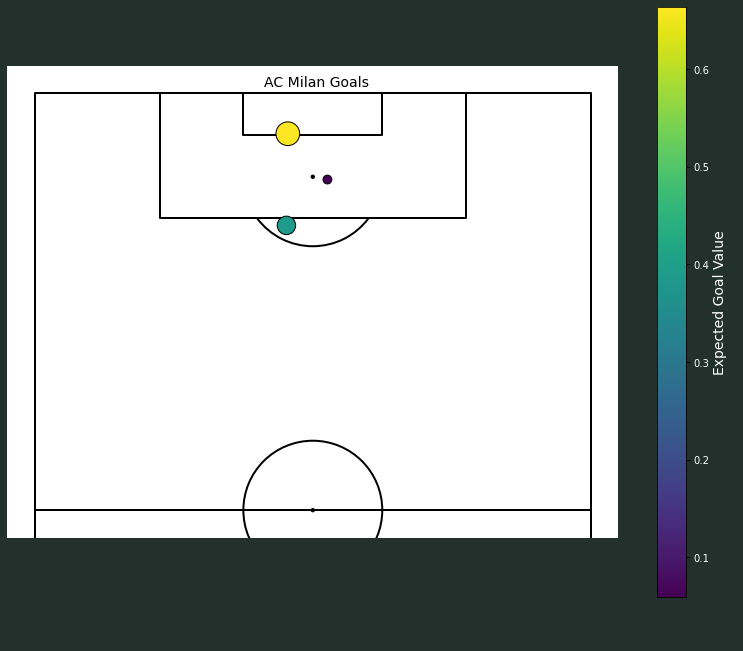

In [153]:
# create a vertical pitch
pitch = VerticalPitch(pitch_type='statsbomb', half=True, goal_type='box', goal_alpha=0.01, pitch_color='white', line_color='black')

fig, axs = pitch.grid(figheight=10, title_height=0, endnote_space=0, axis=False,title_space=0, grid_height=0.82)
fig.set_facecolor("#22312b")

#plotting
scatter_shots = pitch.scatter(away_goals.x, away_goals.y, s=(away_goals.shot_statsbomb_xg * 800) + 30, c=away_goals.shot_statsbomb_xg, edgecolors='black', marker='o', ax=axs['pitch'])

# add text
axs['pitch'].text(33, 121, 'AC Milan' + ' Goals',color='Black',size=14)


# add legend
cbar = fig.colorbar(scatter_shots, ax=axs['pitch'])
cbar.ax.set_ylabel('Expected Goal Value', fontsize=14)
cbar.ax.yaxis.label.set_color('white')
cbar.ax.tick_params(labelcolor='white')
plt.show()